In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기 및 필요 없는 열 제거 + na 제거
data = pd.read_excel(r'C:\Users\user0216\OneDrive - Sejong University\바탕 화면\ESG_classificaion_KG\ESG_KG_personal_project\ESG_only.xlsx')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

label                                               text
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...     ...                                                ...
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...

[60397 rows x 2 columns]

In [3]:
'''
e_list = ['환경경영 목표','원부자재','온실가스','에너지','용수','폐기물','오염물질','환경 법','규제 위반','환경 라벨링']
s_list = ['노동','목표','다양성','양성평등','산업안전','인권','동반성장','지역사회','정보보호','사회 법','규제 위반']
g_list = ['이사회 구성','이사회 활동','주주권리','윤리경영','감사기구','지배구조 법','규제 위반']
'''

"\ne_list = ['환경경영 목표','원부자재','온실가스','에너지','용수','폐기물','오염물질','환경 법','규제 위반','환경 라벨링']\ns_list = ['노동','목표','다양성','양성평등','산업안전','인권','동반성장','지역사회','정보보호','사회 법','규제 위반']\ng_list = ['이사회 구성','이사회 활동','주주권리','윤리경영','감사기구','지배구조 법','규제 위반']\n"

In [4]:
import re
""" 필요 없는 문자 제거 """
def clean_text(row):
    text = row['text']
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("한글 자음 모음 제거 : ", text , "\n")
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("괄호와 괄호안 글자 제거 :  " , text , "\n")
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("특수기호 제거 : ", text , "\n" )
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '["7"]'
    text = re.sub(pattern=pattern, repl='', string=text)   
    text = text.strip()
    # print("양 끝 공백 제거 : ", text , "\n" )
    text = " ".join(text.split())
    # print("중간에 공백은 1개만 : ", text )
    return text

data['text_c'] = data.apply(clean_text, axis=1)
data

label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...  
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...  
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...  
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...  
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다  
...                                                  ...  
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...  
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...  
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...  
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다  
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...  

[60397 rows x 3 columns]

In [5]:
""" 키워드 추출 from title """
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from tqdm import tqdm

kkma = Kkma()
komoran = Komoran()

data['keyword'] = ''
for i in tqdm(range(len(data))):
    nouns_list = komoran.nouns(data['text_c'][i])
    nouns_list_c = [nouns for nouns in nouns_list if len(nouns) > 1]  # 한글자는 이상한게 많아서 2글자 이상
    a = set(nouns_list_c)
    data['keyword'][i] = a
data

100%|██████████| 60397/60397 [03:36<00:00, 278.36it/s]


label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  \
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다   
...                                                  ...   
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...   
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...   
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다   
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...   

                                                 keyword  
0           {강화, 위협, 대응, 예상, 사회, 체계, 변화, 한편, 기후, 국제, 장기}  
1      {강화, 감소, 증가, 사업, 시행, 기후, 대비, 규제, 기법, 확대, 환경영향평...  
2                   {토대, 보호, 대응, 기후, 금융, 변화, 실현, 환경, 구축}  
3      {지향, 니다, 환경, 전략, 친환경, 추진, 경영, 금융, 미래, 선도, 산업, ...  
4                           {활동, 추진, 실천, 효율, 경영, 환경, 절감}  
...                                                  ...  
60392                {사랑, 지속, 베트남, 오픈, 지원, 앞으로, 상반기, 성과}  
60393  {사랑, 국가, 운동, 중국, 기금, 사회, 공헌, 부녀, 발전, 프로젝트, 주관,...  
60394  {사랑, 성금, 중국, 지점, 모금, 기부, 설치, 아시아나항공, 공항, 정기, 실...  
60395                             {사랑, 행사, 점퍼, 후원, 연말연시}  
60396  {방문, 사할린, 지점, 마을, 지원, 중앙아시아, 개최, 모국, 항공권, 노인, ...  

[60397 rows x 4 columns]

In [6]:
e_label = data.loc[data['label'] == 'E']

s_label = data.loc[data['label'] == 'S']
s_label = s_label.reset_index()
s_label = s_label.drop(['index'], axis=1)

g_label = data.loc[data['label'] == 'G']
g_label = g_label.reset_index()
g_label = g_label.drop(['index'], axis=1)

([<matplotlib.axis.XTick at 0x206a53ff408>,
 [Text(0, 0, '15344'), Text(1, 0, '37980'), Text(2, 0, '7073')])

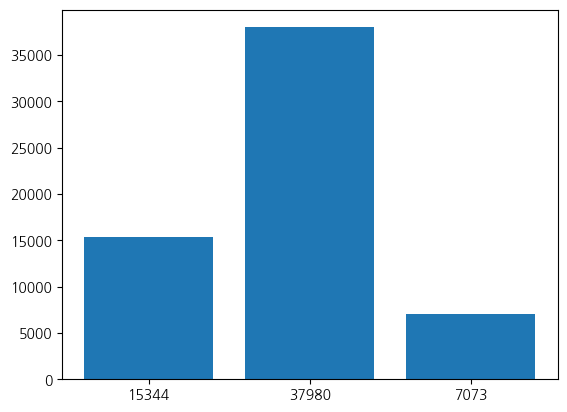

In [7]:
# 각 label별 분포
a = len(e_label)
b = len(s_label)
c = len(g_label)
length = a,b,c

import matplotlib.pyplot as plt
plt.bar(range(len(length)), length)
plt.xticks(range(len(length)), length)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = (g_label['keyword'][0][0],
        g_label['keyword'][0][1])
tfidf_vectorizer = TfidfVectorizer()

# 문장 벡터화 하기(사전 만들기)
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

### 코사인 유사도 ###
from sklearn.metrics.pairwise import cosine_similarity
# 첫 번째와 두 번째 문장 비교
cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("코사인 유사도 측정")
print(cos_similar)